In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [59]:
resps = pd.read_csv('../../results/evaluation/Informativeness of Summaries.csv')
topsum_score = 0
textsum_score = 0
coop_score = 0
with open('../../results/evaluation/answers.txt') as f:
    for question in range(1, len(resps.columns)):
        lines = list()
        for _ in range(5):
            lines.append(f.readline())
        for answer in resps[resps.columns[question]]:
            best_model = lines[int(re.findall(r"\d", answer)[0])][4:]
            if best_model == 'TopSum\n':
                topsum_score += 2
            elif best_model == 'TextSum\n':
                textsum_score += 2
            else:
                coop_score += 2

            second_best_model = lines[int(re.findall(r"\d", answer)[1])][4:]
            if second_best_model == 'TopSum\n':
                topsum_score += 1
            elif second_best_model == 'TextSum\n':
                textsum_score += 1
            else:
                coop_score += 1
f.close()

/tmp/ipykernel_14292/5351453.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


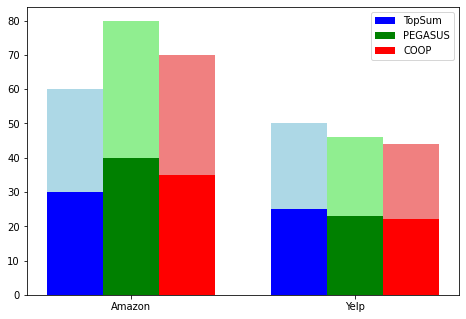

In [2]:
data = [[30, 25],[40, 23],[35, 22]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.bar(X + 0.00, data[0], bottom=data[0], color = 'lightblue', width = 0.25)
ax.bar(X + 0.25, data[1], bottom=data[1], color = 'lightgreen', width = 0.25)
ax.bar(X + 0.50, data[2], bottom=data[2], color = 'lightcoral', width = 0.25)
plt.xticks([r + 0.25 for r in range(2)], ['Amazon', 'Yelp'])
plt.gcf().set_facecolor('white')
ax.legend(labels=['TopSum', 'PEGASUS', 'COOP'])
plt.savefig('human_evaluation.png', bbox_inches='tight')
fig.show()